In this study, I explore several healthcare variables, their distributions and the relationships between them. Before going into the main analysis I convert some of the string variables to numerical and replaced the missing values with the mean values to avoid loss of observations in my analysis. This study consists of two parts. The first part is descriptive analysis where I perform descriptive statistics (i.e. mean, median, std, n, Q1, Q2, Q3, min, max) and pie-chart for categorical variables and histogram and box plot for numerical variables. The second part is inferential statistics which consists of three types of analysis. The first type of analysis is correlations between homocysteine and vitamin levels, the second type is univariate and multivariate regressions to identify the independent effects of each biomarker on Synax Score. Finally, the third type is test of statistical differences for Gender and Syntax Score and Type of Presentation and Peak Creatinine.

In [91]:
#Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import kruskal

In [78]:
df = pd.read_csv('Dataset2.csv', encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   No.                                        81 non-null     int64  
 1   Date of Admission                          81 non-null     object 
 2   D.O.B.                                     81 non-null     object 
 3   Age                                        81 non-null     int64  
 4   Gender                                     81 non-null     object 
 5   Ethnicity                                  81 non-null     object 
 6   Nationality                                81 non-null     object 
 7   Height (cm)                                77 non-null     float64
 8   Weight (kg)                                79 non-null     float64
 9   Type of Presentation                       81 non-null     object 
 10  DM                          

In [79]:
# To convert string values of FOLATE to float
df['FOLATE'] = df['FOLATE'].str.replace('<', '', regex=False)  # Remove '<'
df['FOLATE'] = pd.to_numeric(df['FOLATE'], errors='coerce') # Convert to numeric, handle errors

In [80]:
# To convert string values of B12 to float
df['B12'] = df['B12'].str.replace('<', '', regex=False)  # Remove '<'
df['B12'] = pd.to_numeric(df['B12'], errors='coerce') # Convert to numeric, handle errors

In [81]:
# Replacing the Missing Values with the Mean to avoid loss of observations in my analysis
df['Height (cm)'] = df['Height (cm)'].fillna(df['Height (cm)'].mean())
df['Weight (kg)'] = df['Weight (kg)'].fillna(df['Weight (kg)'].mean())
df['Total Cholesterol'] = df['Total Cholesterol'].fillna(df['Total Cholesterol'].mean())
df['LDL-C'] = df['LDL-C'].fillna(df['LDL-C'].mean())
df['Value pg/mL=ng/L or pmol/L'] = df['Value pg/mL=ng/L or pmol/L'].fillna(df['Value pg/mL=ng/L or pmol/L'].mean())
df['Triglycerides'] = df['Triglycerides'].fillna(df['Triglycerides'].mean())
df['HDL'] = df['HDL'].fillna(df['HDL'].mean())
df['HOMOCYSTEINE'] = df['HOMOCYSTEINE'].fillna(df['HOMOCYSTEINE'].mean())
df['B1'] = df['B1'].fillna(df['B1'].mean())
df['B6'] = df['B6'].fillna(df['B6'].mean())
df['B12'] = df['B12'].fillna(df['B12'].mean())
df['FOLATE'] = df['FOLATE'].fillna(df['FOLATE'].mean())

In [82]:
# Replace the Height cm column with meters
df['Height (cm)'] = df['Height (cm)'] / 100
df.rename(columns={'Height (cm)': 'Height m'}, inplace=True)

In [83]:
# Calculation of BMI
df['BMI'] = df['Weight (kg)']/ df['Height m'] ** 2

In [84]:
# Calculation of Obesity Categorical Variable
df['obesity'] = df['BMI'].apply(lambda x: 'Yes' if x >= 30 else 'No')
# We consider BMI values greater than 30 as obese

PART I: DESCRIPTIVE ANALYSIS    
a-Descriptive Statistics for numerical variables


In [85]:
df.describe()

,No.,Age,Height m,Weight (kg),HR (bpm),BP High,BP Low,Peak Creatinine (µmol/L or mg/dl),Value pg/mL=ng/L or pmol/L,Lowest Hb,...,Triglycerides,HDL,"If Dead, date of death",HOMOCYSTEINE,B12,FOLATE,B1,B6,SYNTAX,BMI
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,0.0,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,43.864198,1.692208,86.848101,81.716049,130.827160,80.185185,84.775309,130.647500,14.179506,...,1.957662,1.012597,NaN,9.152464,267.648649,21.679730,27.616364,12.218182,12.728395,30.259056
std,23.526581,7.944736,0.073699,17.137297,18.670320,23.084513,15.895842,45.891951,168.460764,2.031205,...,1.304951,0.303996,NaN,4.160187,112.077142,7.713413,5.821464,4.486566,10.190697,5.271622
min,1.000000,18.000000,1.440000,54.000000,51.000000,90.000000,51.000000,45.000000,10.000000,8.200000,...,0.500000,0.310000,NaN,1.640000,21.000000,7.400000,14.900000,4.600000,0.000000,18.685121
25%,21.000000,40.000000,1.650000,78.000000,70.000000,115.000000,70.000000,71.400000,20.600000,13.300000,...,1.190000,0.840000,NaN,7.070000,182.000000,15.300000,24.600000,9.300000,5.000000,27.117769
50%,41.000000,45.000000,1.700000,84.000000,80.000000,128.000000,80.000000,78.000000,91.600000,14.500000,...,1.620000,0.970000,NaN,8.800000,260.000000,21.500000,27.616364,12.218182,10.000000,29.384757
75%,61.000000,50.000000,1.720000,97.000000,90.000000,143.000000,89.000000,86.700000,130.647500,15.400000,...,2.190000,1.120000,NaN,9.580000,318.000000,25.500000,30.400000,12.218182,19.000000,33.262141
max,81.000000,61.000000,1.880000,139.000000,160.000000,220.000000,140.000000,462.700000,1031.500000,17.900000,...,7.480000,2.230000,NaN,33.860000,607.000000,39.300000,43.100000,26.400000,37.000000,48.096886


PART I/b- Histograms, Boxplot and Pie-charts:   
I create histogram for numerical variables to see the distribution of these variables. I also create box plot to see outliers for numerical variables. For categorical variables I create pie chart.

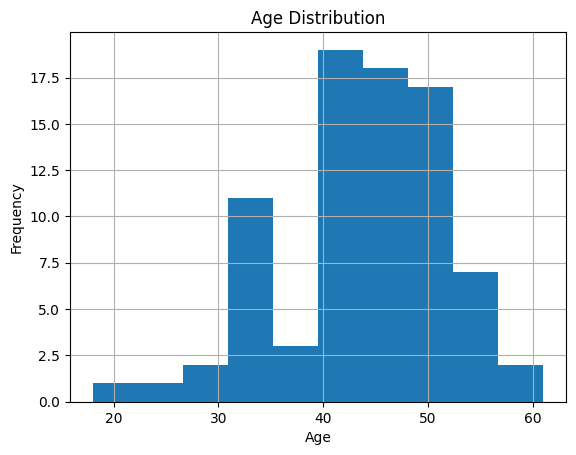

In [12]:
#Histogram for age
df['Age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

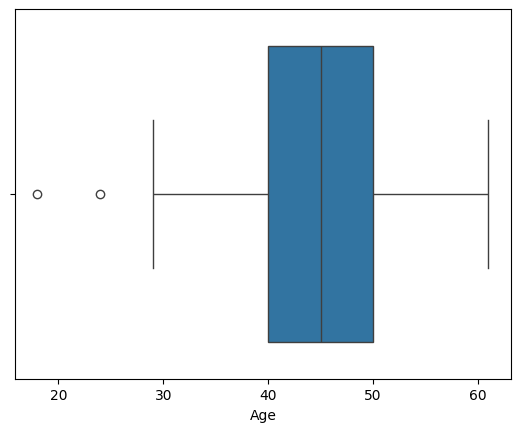

In [13]:
# Create the box plot for Age
sns.boxplot(x=df['Age'])
plt.show()

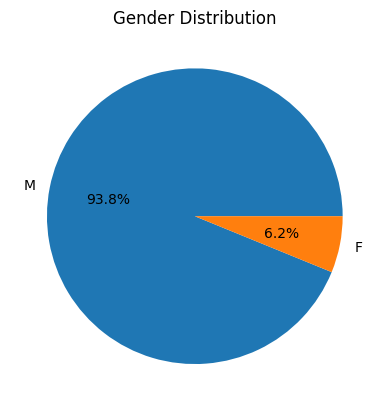

In [14]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

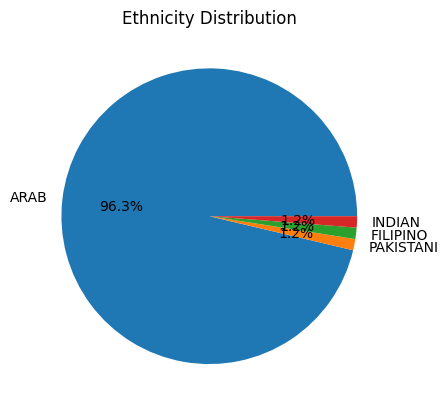

In [15]:
# Count the occurrences of each etnicity
etnicity_counts = df['Ethnicity'].value_counts()

# Create the pie chart
plt.pie(etnicity_counts, labels=etnicity_counts.index, autopct='%1.1f%%')
plt.title('Ethnicity Distribution')
plt.show()

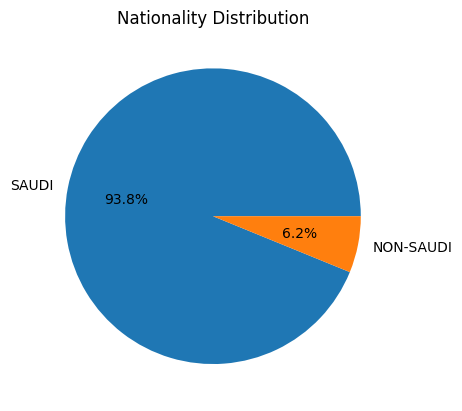

In [16]:
# Count the occurrences of each Nationality
nationality_counts = df['Nationality'].value_counts()

# Create the pie chart
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%')
plt.title('Nationality Distribution')
plt.show()

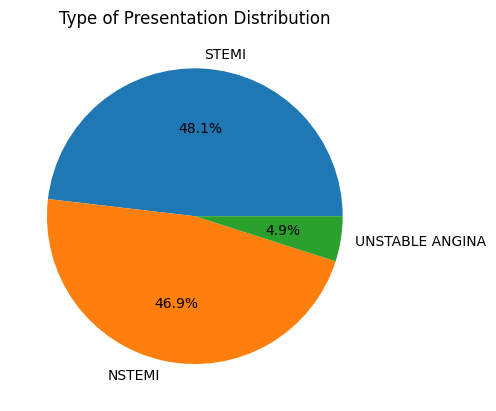

In [17]:
# Count the occurrences of each Type of Presentation
presentation_counts = df['Type of Presentation'].value_counts()

# Create the pie chart
plt.pie(presentation_counts, labels=presentation_counts.index, autopct='%1.1f%%')
plt.title('Type of Presentation Distribution')
plt.show()

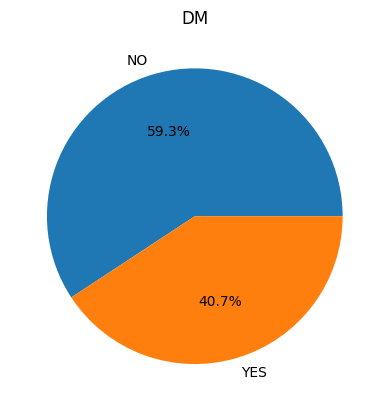

In [ ]:
# Count the occurrences of each DM
DM_counts = df['DM'].value_counts()

# Create the pie chart
plt.pie(DM_counts, labels=DM_counts.index, autopct='%1.1f%%')
plt.title('DM')
plt.show()

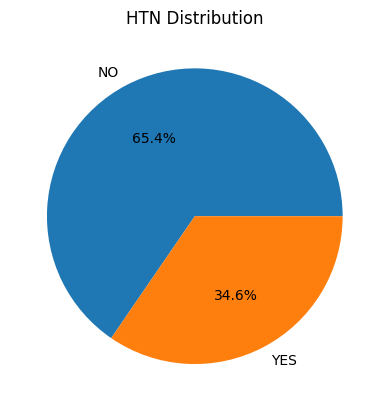

In [ ]:
# Count the occurrences of each HTN
HTN_counts = df['HTN'].value_counts()

# Create the pie chart
plt.pie(HTN_counts, labels=HTN_counts.index, autopct='%1.1f%%')
plt.title('HTN Distribution')
plt.show()

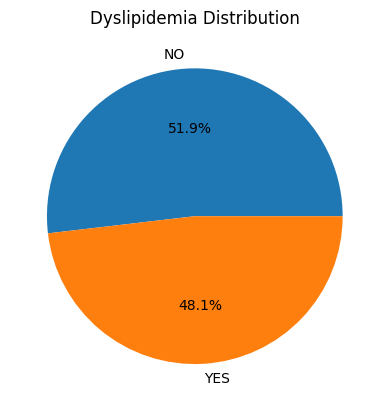

In [ ]:
# Count the occurrences of each Dyslipidemia
Dyslipidemia_counts = df['Dyslipidemia'].value_counts()

# Create the pie chart
plt.pie(Dyslipidemia_counts, labels=Dyslipidemia_counts.index, autopct='%1.1f%%')
plt.title('Dyslipidemia Distribution')
plt.show()

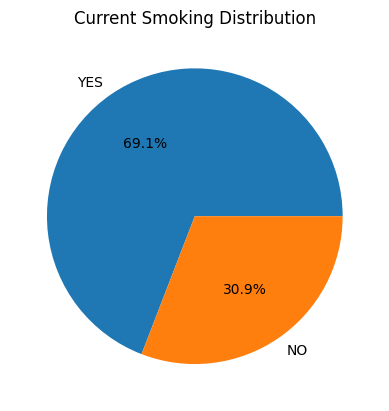

In [ ]:
# Count the occurrences of each Current Smoking
smoking_counts = df['Current Smoking'].value_counts()

# Create the pie chart
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%')
plt.title('Current Smoking Distribution')
plt.show()

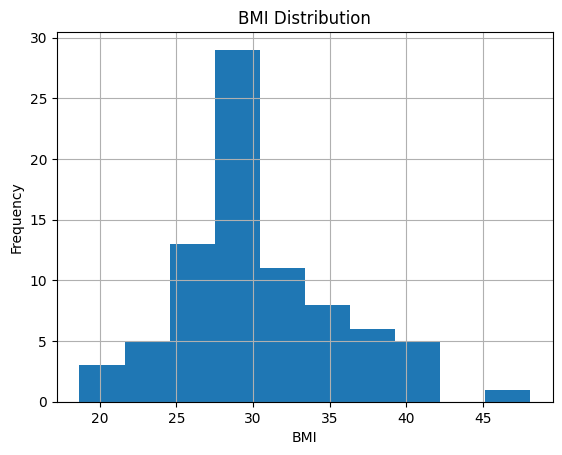

In [18]:
#Histogram for BMI
df['BMI'].hist(bins=10)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

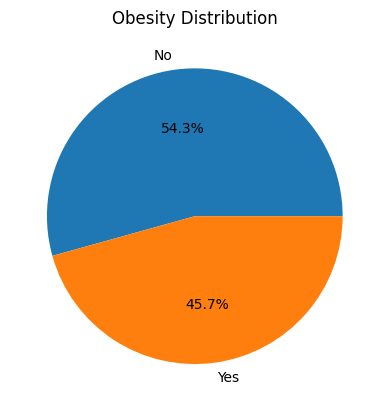

In [19]:
# Count the occurrences of obesity
obesity_counts = df['obesity'].value_counts()

# Create the pie chart
plt.pie(obesity_counts, labels=obesity_counts.index, autopct='%1.1f%%')
plt.title('Obesity Distribution')
plt.show()

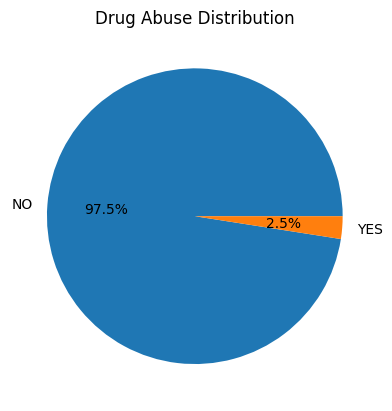

In [20]:
# Count the occurrences of Drug Abuse
drug_counts = df['Drug Abuse'].value_counts()

# Create the pie chart
plt.pie(drug_counts, labels=drug_counts.index, autopct='%1.1f%%')
plt.title('Drug Abuse Distribution')
plt.show()

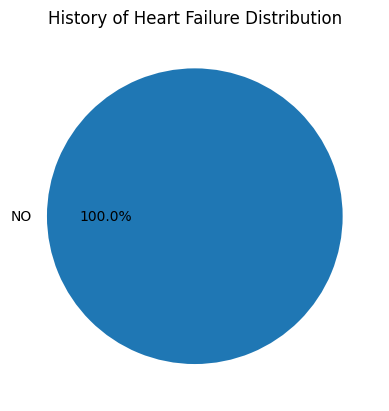

In [ ]:
# Count the occurrences of each History of Heart Failure
failure_counts = df['History of Heart Failure'].value_counts()

# Create the pie chart
plt.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%')
plt.title('History of Heart Failure Distribution')
plt.show()

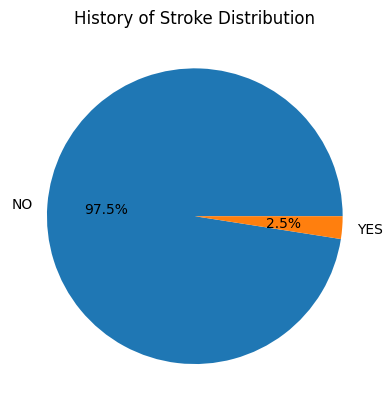

In [ ]:
# Count the occurrences of each History of Stroke
stroke_counts = df['History of Stroke'].value_counts()

# Create the pie chart
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%')
plt.title('History of Stroke Distribution')
plt.show()

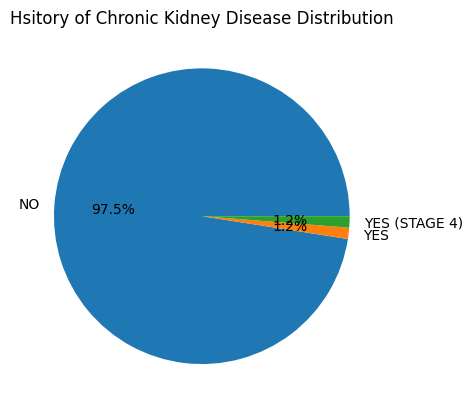

In [23]:
# Count the occurrences of each History of chronic kidney disease
kidney_counts = df['Hsitory of chronic kidney disease'].value_counts()

# Create the pie chart
plt.pie(kidney_counts, labels=kidney_counts.index, autopct='%1.1f%%')
plt.title('Hsitory of Chronic Kidney Disease Distribution')
plt.show()

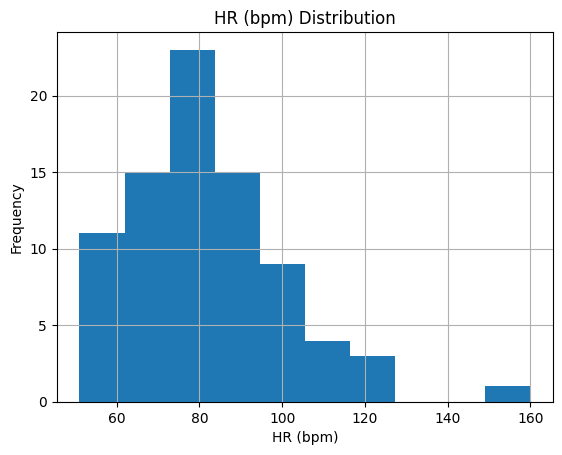

In [25]:
#Histogram for HR (bpm)
df['HR (bpm)'].hist(bins=10)
plt.xlabel('HR (bpm)')
plt.ylabel('Frequency')
plt.title('HR (bpm) Distribution')
plt.show()

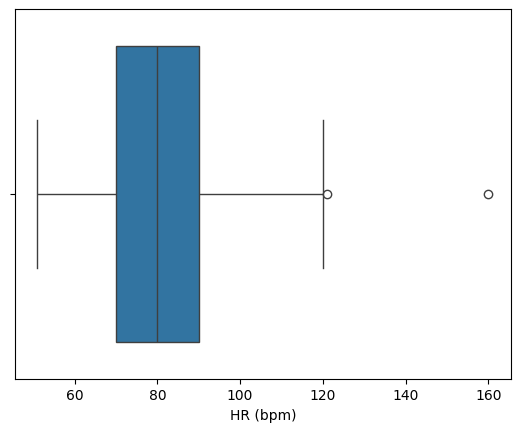

In [26]:
# Create the box plot for HR (bpm)
sns.boxplot(x=df['HR (bpm)'])
plt.show()

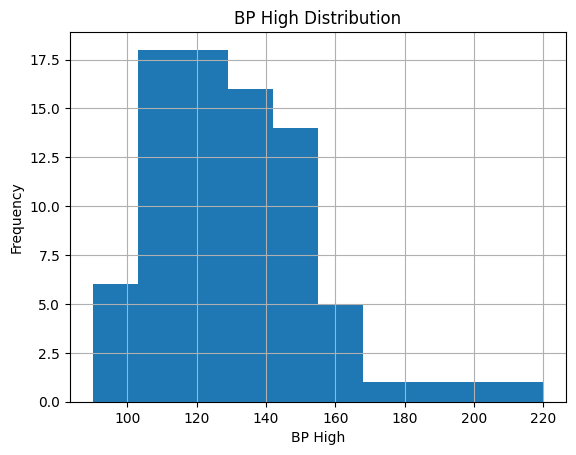

In [27]:
#Histogram for BP High
df['BP High'].hist(bins=10)
plt.xlabel('BP High')
plt.ylabel('Frequency')
plt.title('BP High Distribution')
plt.show()

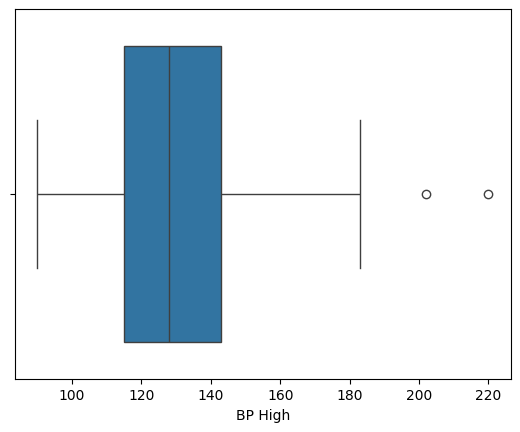

In [28]:
# Create the box plot for BP High
sns.boxplot(x=df['BP High'])
plt.show()

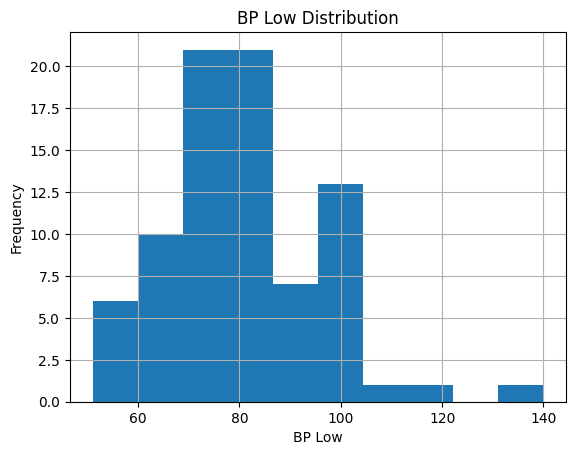

In [29]:
#Histogram for BP Low
df['BP Low'].hist(bins=10)
plt.xlabel('BP Low')
plt.ylabel('Frequency')
plt.title('BP Low Distribution')
plt.show()

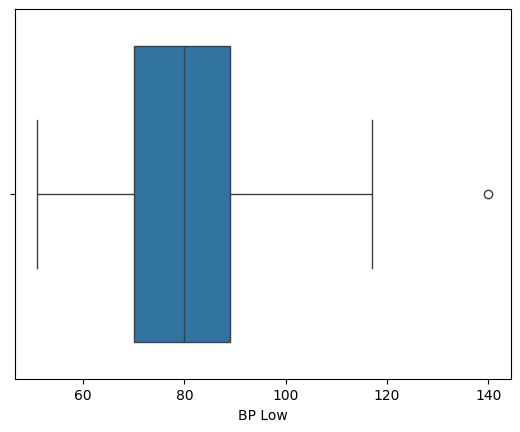

In [30]:
# Create the box plot for BP Low
sns.boxplot(x=df['BP Low'])
plt.show()

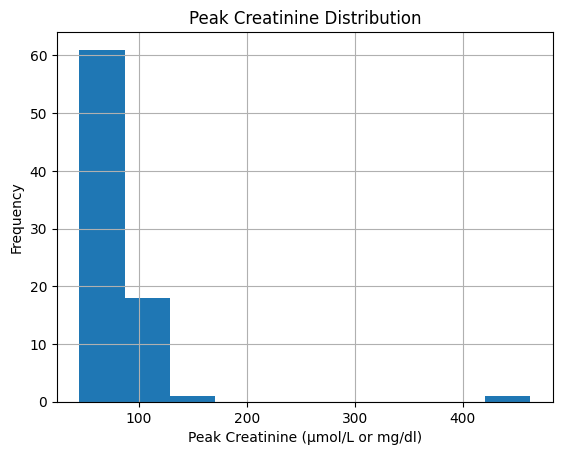

In [31]:
#Histogram for Peak Creatinine
df['Peak Creatinine (µmol/L or mg/dl)'].hist(bins=10)
plt.xlabel('Peak Creatinine (µmol/L or mg/dl)')
plt.ylabel('Frequency')
plt.title('Peak Creatinine Distribution')
plt.show()

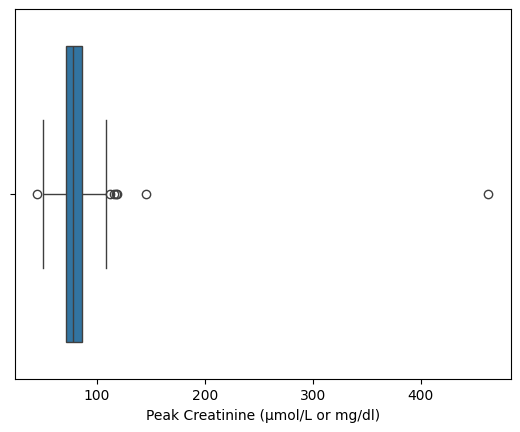

In [32]:
# Create the box plot for Peak Creatinine
sns.boxplot(x=df['Peak Creatinine (µmol/L or mg/dl)'])
plt.show()

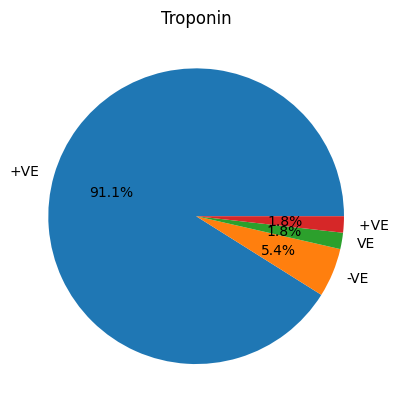

In [33]:
# Count the occurrences of each Troponin
Troponin_counts = df['Troponin'].value_counts()

# Create the pie chart
plt.pie(Troponin_counts, labels=Troponin_counts.index, autopct='%1.1f%%')
plt.title('Troponin')
plt.show()

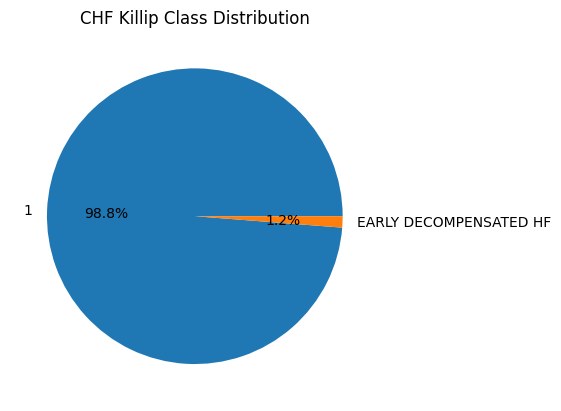

In [34]:
# Count the occurrences of each CHF Killip Class
CHF_counts = df['CHF Killip Class'].value_counts()

# Create the pie chart
plt.pie(CHF_counts, labels=CHF_counts.index, autopct='%1.1f%%')
plt.title('CHF Killip Class Distribution')
plt.show()

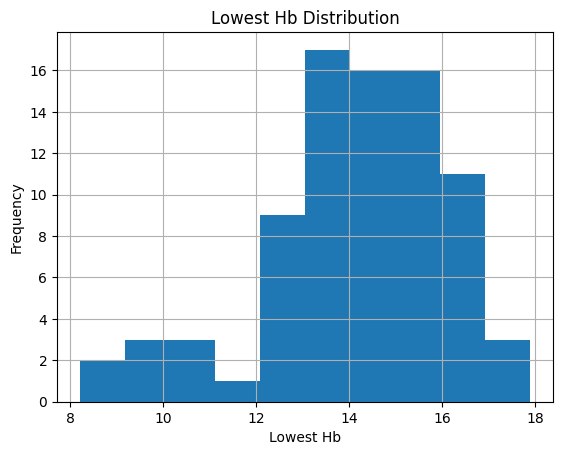

In [35]:
#Histogram for Lowest Hb
df['Lowest Hb'].hist(bins=10)
plt.xlabel('Lowest Hb')
plt.ylabel('Frequency')
plt.title('Lowest Hb Distribution')
plt.show()

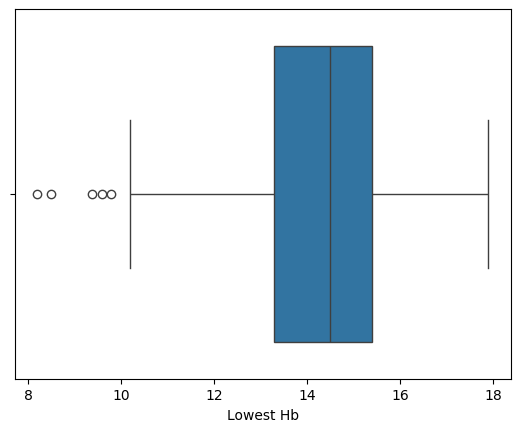

In [36]:
# Create the box plot for 'Lowest Hb
sns.boxplot(x=df['Lowest Hb'])
plt.show()

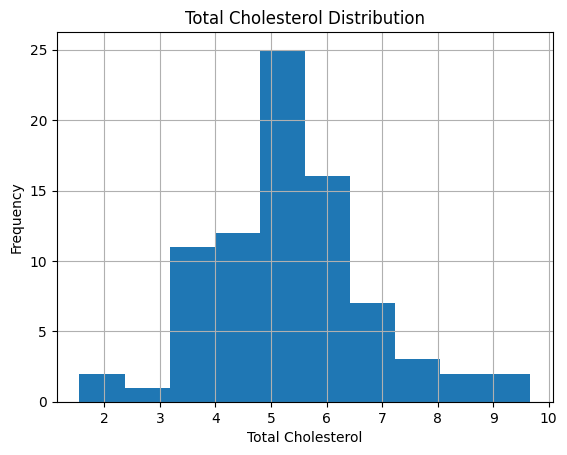

In [37]:
#Histogram for Total Cholesterol
df['Total Cholesterol'].hist(bins=10)
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')
plt.title('Total Cholesterol Distribution')
plt.show()

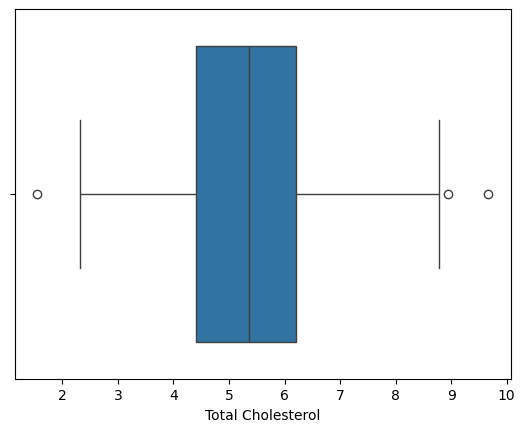

In [38]:
# Create the box plot for Total Cholesterol
sns.boxplot(x=df['Total Cholesterol'])
plt.show()

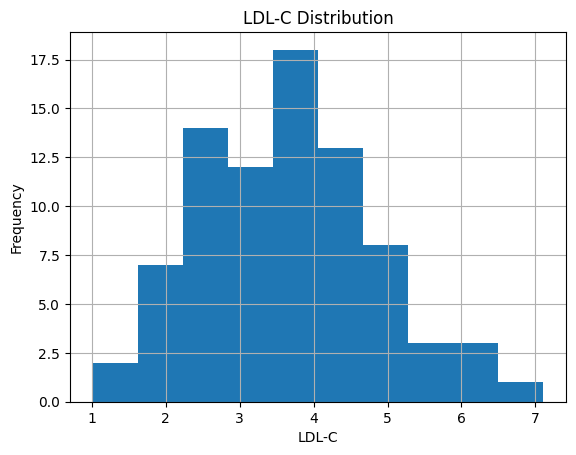

In [39]:
#Histogram for LDL-C
df['LDL-C'].hist(bins=10)
plt.xlabel('LDL-C')
plt.ylabel('Frequency')
plt.title('LDL-C Distribution')
plt.show()

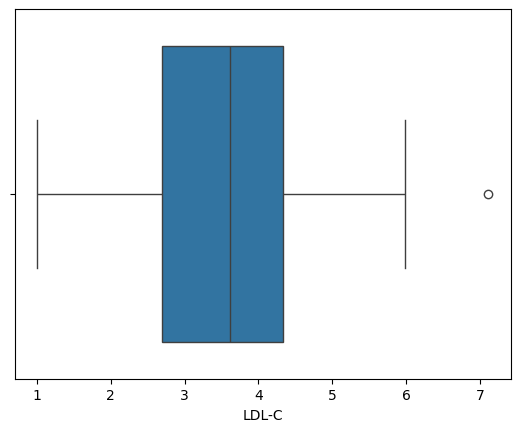

In [40]:
# Create the box plot for LDL-C
sns.boxplot(x=df['LDL-C'])
plt.show()

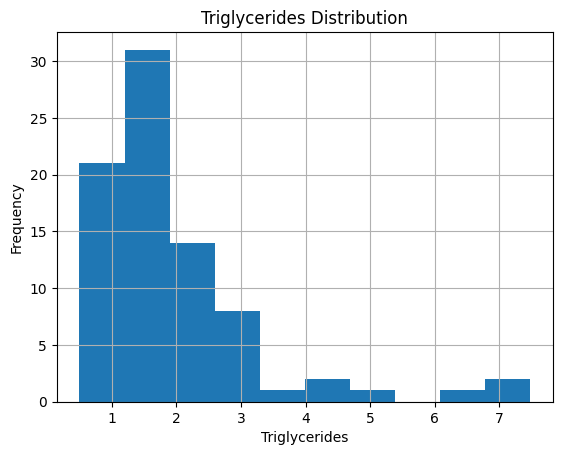

In [41]:
#Histogram for Triglycerides
df['Triglycerides'].hist(bins=10)
plt.xlabel('Triglycerides')
plt.ylabel('Frequency')
plt.title('Triglycerides Distribution')
plt.show()

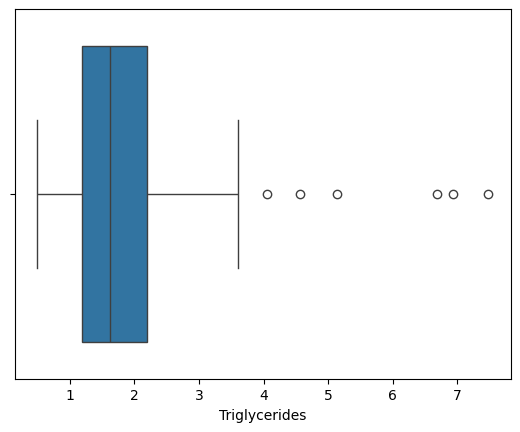

In [42]:
# Create the box plot for Triglycerides
sns.boxplot(x=df['Triglycerides'])
plt.show()

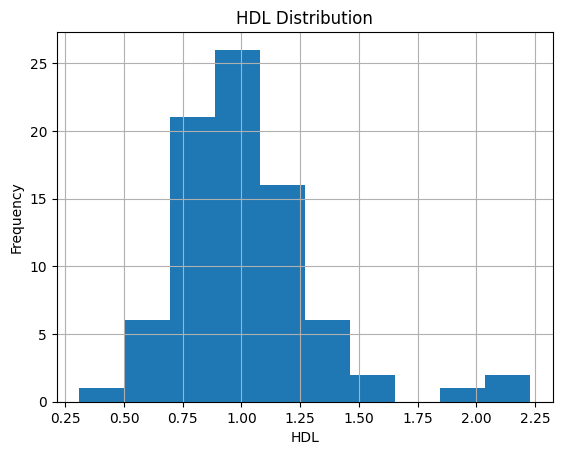

In [43]:
#Histogram for HDL
df['HDL'].hist(bins=10)
plt.xlabel('HDL')
plt.ylabel('Frequency')
plt.title('HDL Distribution')
plt.show()

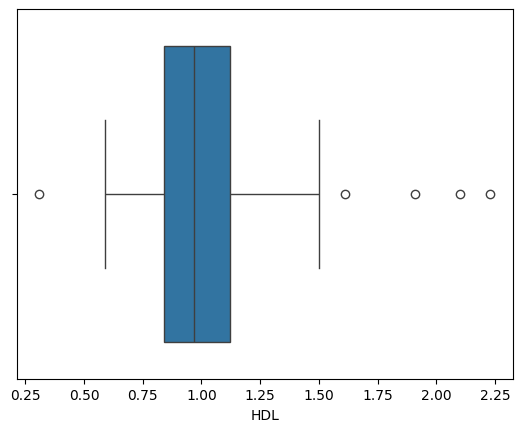

In [44]:
# Create the box plot for HDL
sns.boxplot(x=df['HDL'])
plt.show()

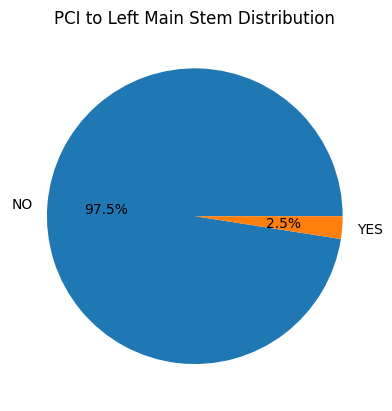

In [45]:
# Count the occurrences of each PCI to Left Main stem
PCI_counts = df['PCI to Left Main stem'].value_counts()

# Create the pie chart
plt.pie(PCI_counts, labels=PCI_counts.index, autopct='%1.1f%%')
plt.title('PCI to Left Main Stem Distribution')
plt.show()

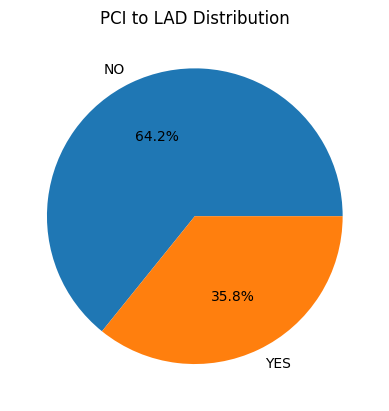

In [46]:
# Count the occurrences of each PCI to LAD
LAD_counts = df['PCI to LAD'].value_counts()

# Create the pie chart
plt.pie(LAD_counts, labels=LAD_counts.index, autopct='%1.1f%%')
plt.title('PCI to LAD Distribution')
plt.show()

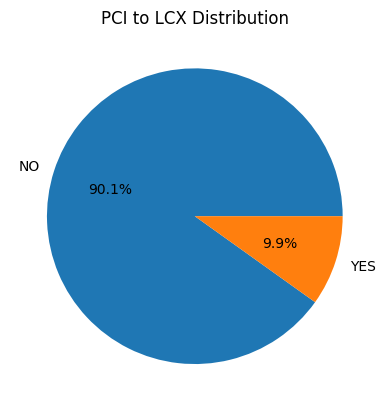

In [47]:
# Count the occurrences of each PCI to LCX
LCX_counts = df['PCI to LCX'].value_counts()

# Create the pie chart
plt.pie(LCX_counts, labels=LCX_counts.index, autopct='%1.1f%%')
plt.title('PCI to LCX Distribution')
plt.show()

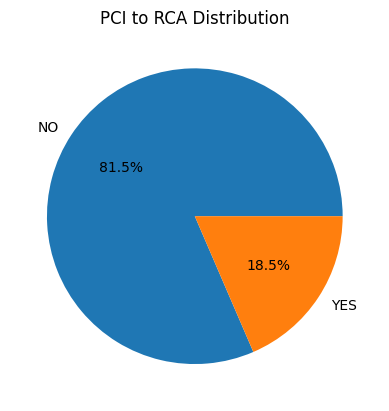

In [48]:
# Count the occurrences of each PCI to RCA
RCA_counts = df['PCI to RCA'].value_counts()

# Create the pie chart
plt.pie(RCA_counts, labels=RCA_counts.index, autopct='%1.1f%%')
plt.title('PCI to RCA Distribution')
plt.show()

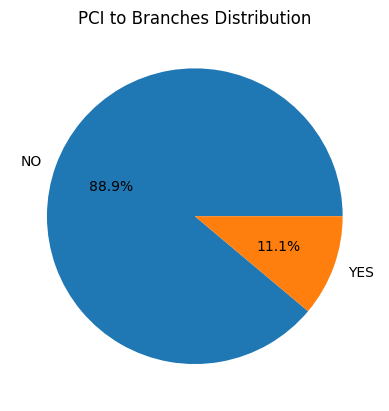

In [50]:
# Count the occurrences of each PCI to branches
branches_counts = df['PCI to branches'].value_counts()

# Create the pie chart
plt.pie(branches_counts, labels=branches_counts.index, autopct='%1.1f%%')
plt.title('PCI to Branches Distribution')
plt.show()

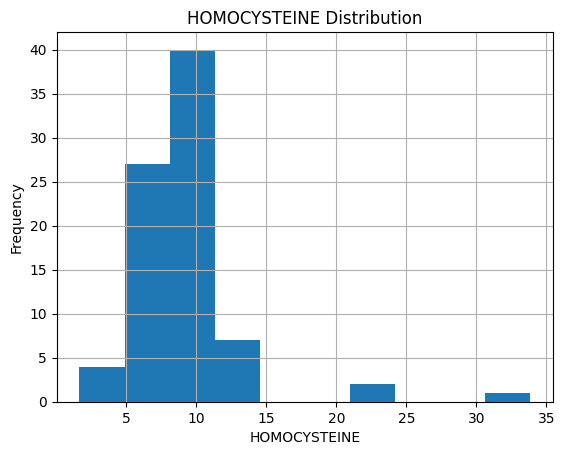

In [51]:
#Histogram for HOMOCYSTEINE
df['HOMOCYSTEINE'].hist(bins=10)
plt.xlabel('HOMOCYSTEINE')
plt.ylabel('Frequency')
plt.title('HOMOCYSTEINE Distribution')
plt.show()

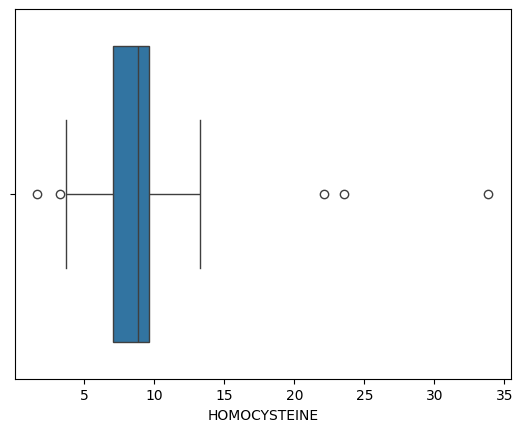

In [52]:
# Create the box plot for HOMOCYSTEINE
sns.boxplot(x=df['HOMOCYSTEINE'])
plt.show()

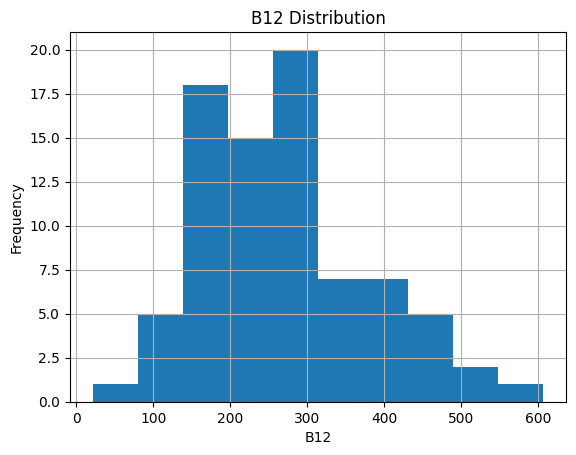

In [53]:
#Histogram for B12
df['B12'].hist(bins=10)
plt.xlabel('B12')
plt.ylabel('Frequency')
plt.title('B12 Distribution')
plt.show()

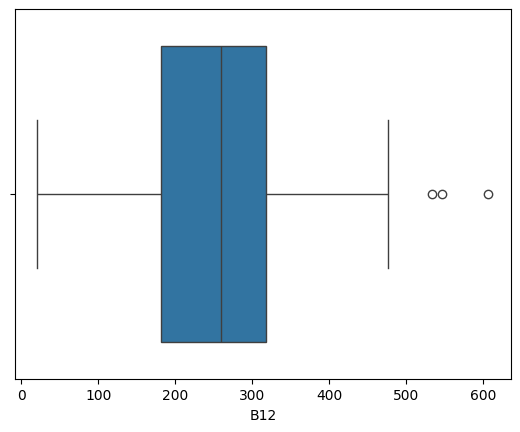

In [54]:
# Create the box plot for B12
sns.boxplot(x=df['B12'])
plt.show()

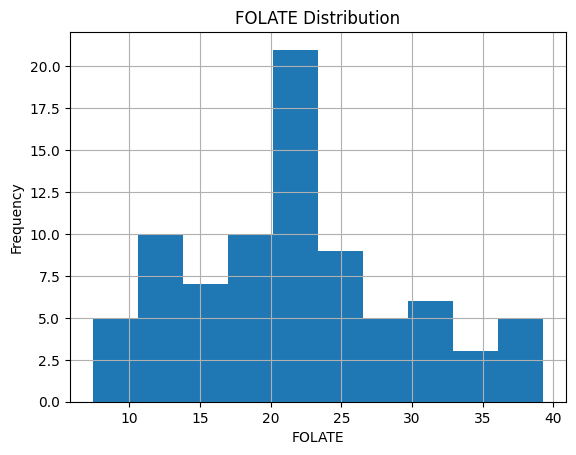

In [55]:
#Histogram for FOLATE
df['FOLATE'].hist(bins=10)
plt.xlabel('FOLATE')
plt.ylabel('Frequency')
plt.title('FOLATE Distribution')
plt.show()

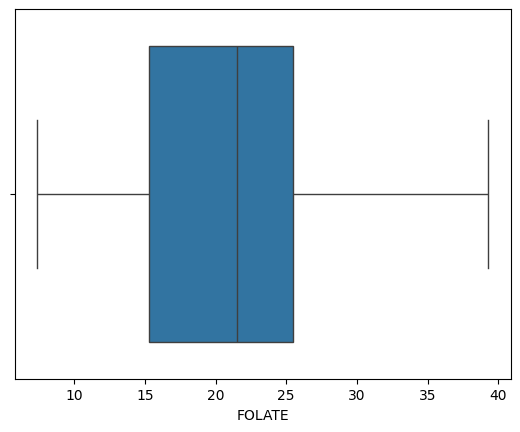

In [56]:
# Create the box plot for FOLATE
sns.boxplot(x=df['FOLATE'])
plt.show()

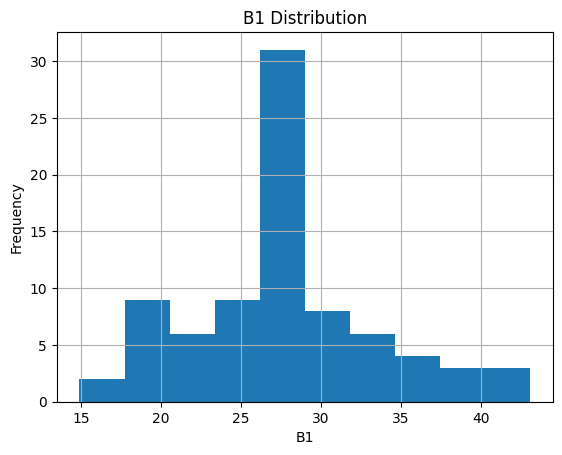

In [57]:
#Histogram for B1
df['B1'].hist(bins=10)
plt.xlabel('B1')
plt.ylabel('Frequency')
plt.title('B1 Distribution')
plt.show()

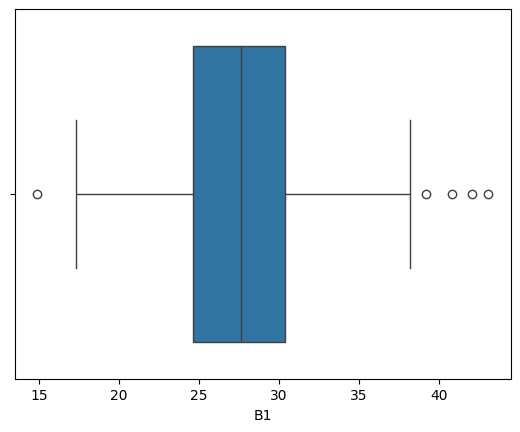

In [58]:
# Create the box plot for B1
sns.boxplot(x=df['B1'])
plt.show()

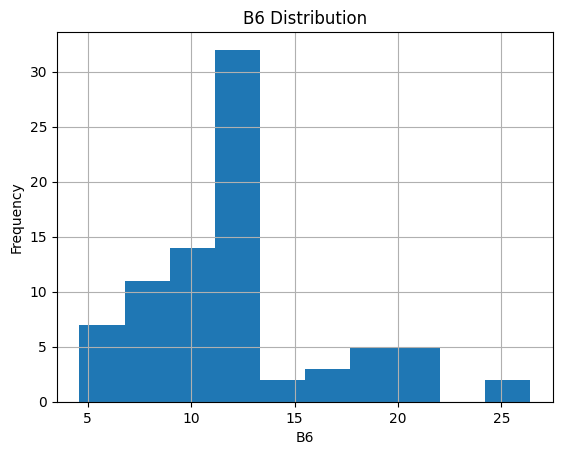

In [ ]:
#Histogram for B6
df['B6'].hist(bins=10)
plt.xlabel('B6')
plt.ylabel('Frequency')
plt.title('B6 Distribution')
plt.show()

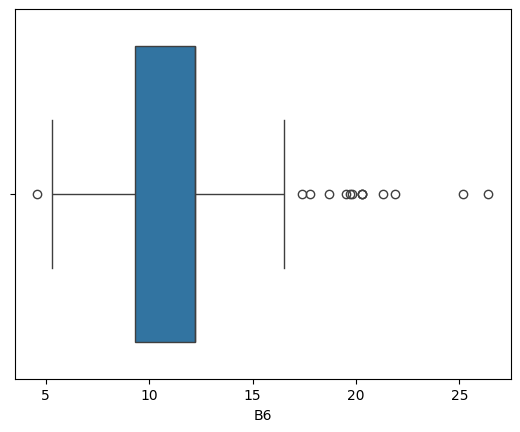

In [ ]:
# Create the box plot for B6
sns.boxplot(x=df['B6'])
plt.show()

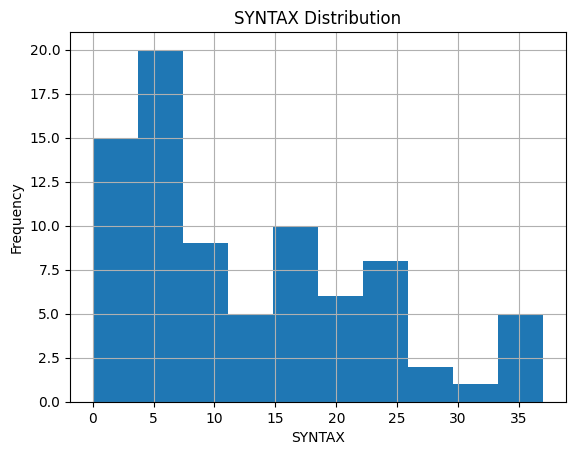

In [ ]:
#Histogram for SYNTAX
df['SYNTAX'].hist(bins=10)
plt.xlabel('SYNTAX')
plt.ylabel('Frequency')
plt.title('SYNTAX Distribution')
plt.show()

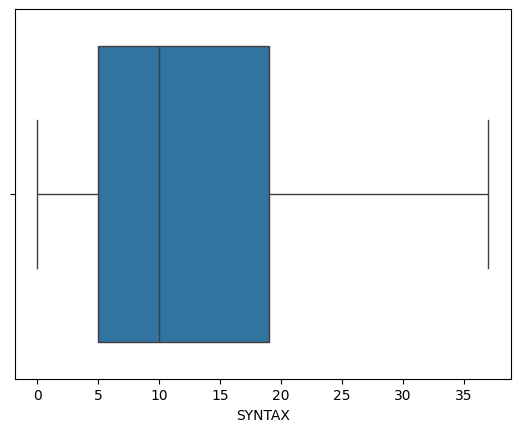

In [ ]:
# Create the box plot for SYNTAX
sns.boxplot(x=df['SYNTAX'])
plt.show()

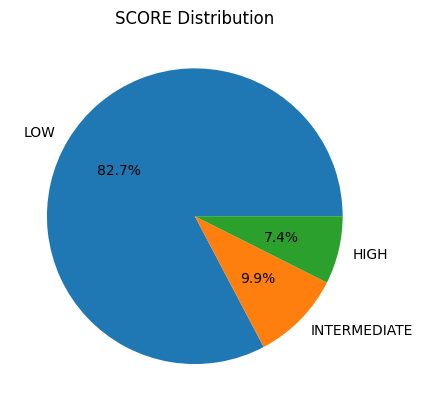

In [59]:
# Count the occurrences of each SCORE
score_counts = df['SCORE'].value_counts()

# Create the pie chart
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%')
plt.title('SCORE Distribution')
plt.show()

PART II: INFERENTIAL STATISTICS                                               
a-Correlation Analysis

Below I perform Shapiro-Wilk Normality test for some of the variables because we perform correlation analysis for these variables. The purpose of normality test to evaluate whether I should use Spearman or Pearson correlations.

In [60]:
#TEST OF NORMAILITY for HOMOCYSTEINE
import pandas as pd
from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(df['HOMOCYSTEINE'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Shapiro-Wilk Test Statistic: 0.6810466124732697
P-Value: 5.639512968992049e-12


In [61]:
#TEST OF NORMAILITY for FOLATE
import pandas as pd
from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(df['FOLATE'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Shapiro-Wilk Test Statistic: 0.9684795194469016
P-Value: 0.043215393136519925


In [ ]:
#TEST OF NORMAILITY for B12
import pandas as pd
from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(df['B12'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Shapiro-Wilk Test Statistic: 0.9582396379754166
P-Value: 0.009867702575119656


In [ ]:
#TEST OF NORMAILITY for B1
import pandas as pd
from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(df['B1'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Shapiro-Wilk Test Statistic: 0.9537162491239933
P-Value: 0.005281429920828372


In [62]:
#TEST OF NORMAILITY for B6
import pandas as pd
from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(df['B6'])

# Print the results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Shapiro-Wilk Test Statistic: 0.8960679103744863
P-Value: 7.436769462922874e-06


Since normality is rejected for all the variables we look at Spearman correlations rather than Pearson.

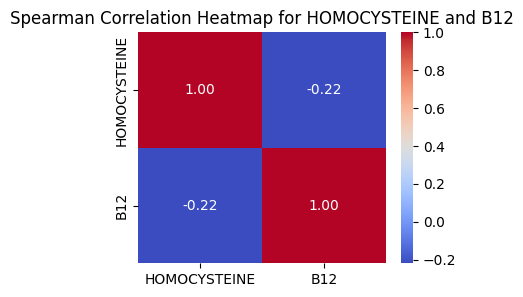

In [87]:
# Spearman Correlation for HOMOCYSTEINE and B12
spearman_corr = df[['HOMOCYSTEINE', 'B12']].corr(method='spearman')
# Plot heatmap for the two columns
plt.figure(figsize=(4, 3))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Spearman Correlation Heatmap for HOMOCYSTEINE and B12')
plt.show()

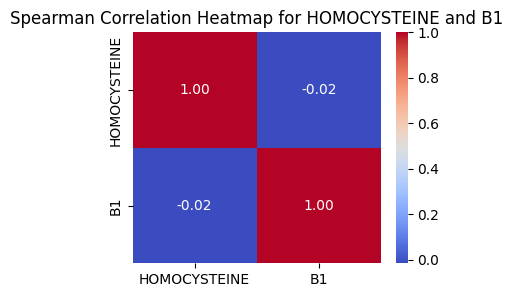

In [88]:
# Spearman Correlation for HOMOCYSTEINE and B1
spearman_corr = df[['HOMOCYSTEINE', 'B1']].corr(method='spearman')
# Plot heatmap for the two columns
plt.figure(figsize=(4, 3))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Spearman Correlation Heatmap for HOMOCYSTEINE and B1')
plt.show()

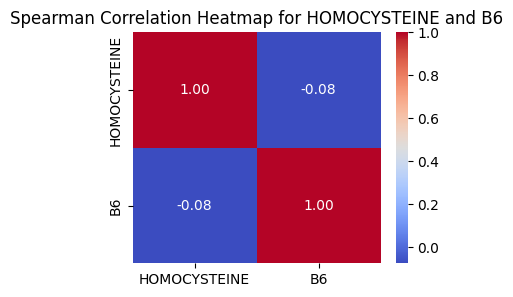

In [89]:
# Spearman Correlation for HOMOCYSTEINE and B6
spearman_corr = df[['HOMOCYSTEINE', 'B6']].corr(method='spearman')
# Plot heatmap for the two columns
plt.figure(figsize=(4, 3))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Spearman Correlation Heatmap for HOMOCYSTEINE and B6')
plt.show()

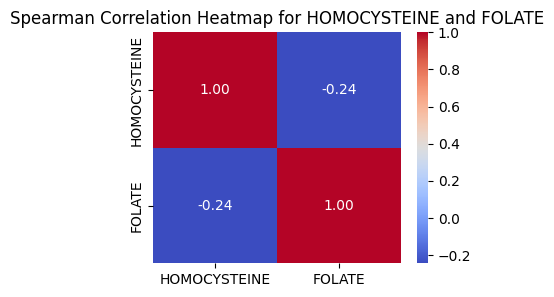

In [90]:
# Spearman Correlation for HOMOCYSTEINE and FOLATE
spearman_corr = df[['HOMOCYSTEINE', 'FOLATE']].corr(method='spearman')
# Plot heatmap for the two columns
plt.figure(figsize=(4, 3))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Spearman Correlation Heatmap for HOMOCYSTEINE and FOLATE')
plt.show()

PART II/b-Regression Analysis

Coefficient: [-0.00541615]
R-squared: 0.0005949028846859994


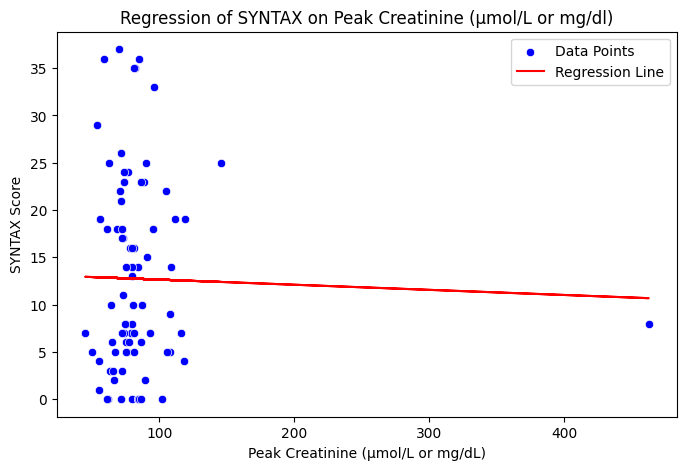

In [70]:
# Regression of SYNTAX on Peak Creatinine
y = df[['SYNTAX']]  # Predictor
# Reshape X to be a 2D array using reshape(-1, 1)
X = df['Peak Creatinine (µmol/L or mg/dl)'].values.reshape(-1, 1)  # Response variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Coefficients
print(f"Coefficient: {model.coef_[0]}")

# Evaluate model
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# Visualization
plt.figure(figsize=(8, 5))
# Changed x to the correct column name 'Peak Creatinine (µmol/L or mg/dl)'
sns.scatterplot(x='Peak Creatinine (µmol/L or mg/dl)', y='SYNTAX', data=df, color='blue', label='Data Points')
plt.plot(df['Peak Creatinine (µmol/L or mg/dl)'], y_pred, color='red', label='Regression Line')
plt.xlabel('Peak Creatinine (µmol/L or mg/dL)')
plt.ylabel('SYNTAX Score')
plt.title('Regression of SYNTAX on Peak Creatinine (µmol/L or mg/dl)')
plt.legend()
plt.show()

Regression of SYNTAX on Peak Creatinine:  
The coefficient estimate of Peak Creatinine is -0.0054 extremely small. Moreover, the regression line is almost flat suggesting that this negative relationship is quite weak. In addition, the R-squared  is 0.00059 suggesting that Peak Creatinine does not have much explanatory power. The above scatter plot shows that data points are far from regression line consistent with very low R-squared suggesting that Peak Creatinine does not have any explanatory power in explaining the variation in SYNTAX.

Coefficient: [-0.48999942]
R-squared: 0.009538733003386701


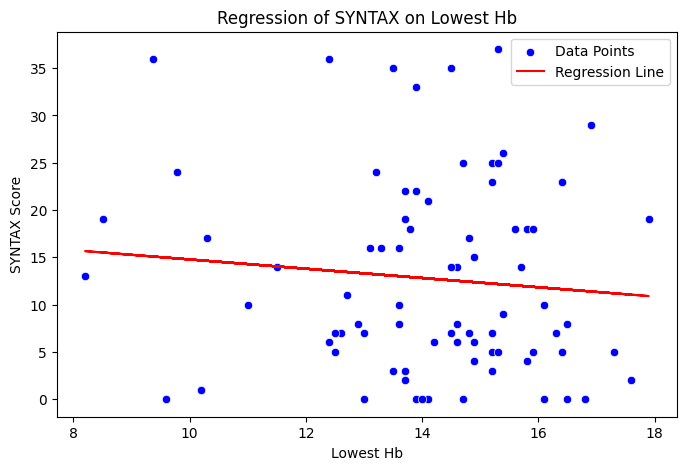

In [69]:
# REGRESSION OF SYNTAX ON LOWEST HB
y = df[['SYNTAX']]  # Predictor
# Reshape X to be a 2D array using reshape(-1, 1)
X = df['Lowest Hb'].values.reshape(-1, 1)  # Response variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Coefficients
print(f"Coefficient: {model.coef_[0]}")

# Evaluate model
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# Visualization
plt.figure(figsize=(8, 5))
# Changed x to the correct column name 'Peak Creatinine (µmol/L or mg/dl)'
sns.scatterplot(x='Lowest Hb', y='SYNTAX', data=df, color='blue', label='Data Points')
plt.plot(df['Lowest Hb'], y_pred, color='red', label='Regression Line')
plt.xlabel('Lowest Hb')
plt.ylabel('SYNTAX Score')
plt.title('Regression of SYNTAX on Lowest Hb')
plt.legend()
plt.show()

Regression of SYNTAX on Lowest Hb:  
The
coefficient estimate is -0.49 suggesting that there is a negative relationship. However, the
regression line is almost flat suggesting that this negative relationship is quite weak. The R-squared is
0.0095 suggesting that the model has some explanatory power compared to previous model but
the model fit is still poor. The above scatter plot shows that the data points are spread out and some data points are far away from
regression line. This finding explains the poor model fit and low R-squared.

Coefficient: [-0.20184823]
R-squared: 0.0008013911952923225


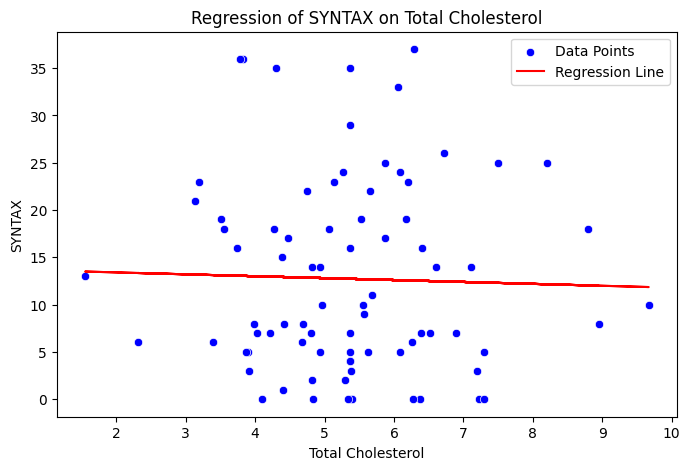

In [ ]:
# REGRESSION OF SYNTAX ON TOTAL CHOLESTEROL
y = df[['SYNTAX']]  # Predictor
# Reshape X to be a 2D array using reshape(-1, 1)
X = df['Total Cholesterol'].values.reshape(-1, 1)  # Response variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Coefficients
print(f"Coefficient: {model.coef_[0]}")

# Evaluate model
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# Visualization
plt.figure(figsize=(8, 5))
# Changed x to the correct column name 'Peak Creatinine (µmol/L or mg/dl)'
sns.scatterplot(x='Total Cholesterol', y='SYNTAX', data=df, color='blue', label='Data Points')
plt.plot(df['Total Cholesterol'], y_pred, color='red', label='Regression Line')
plt.xlabel('Total Cholesterol')
plt.ylabel('SYNTAX')
plt.title('Regression of SYNTAX on Total Cholesterol')
plt.legend()
plt.show()

Regression of SYNTAX on Total Cholesterol:

The
coefficient estimate of Total Cholesterol is -0.20 suggesting that there is a negative relationship
between the two variables. However, the regression line is almost flat suggesting that this
negative relationship is quite weak. Moreover, the R-squared is 0,0008 very low suggesting that Total
Cholesterol does not have much power in explaining the variation in SYNTAX. The above scatter plot shows that data points is quite spread out and some of them are very far away from regression line.
This finding explains low R-squared and bad model fit.

Coefficient: [-0.49295836]
R-squared: 0.0034268111391966283


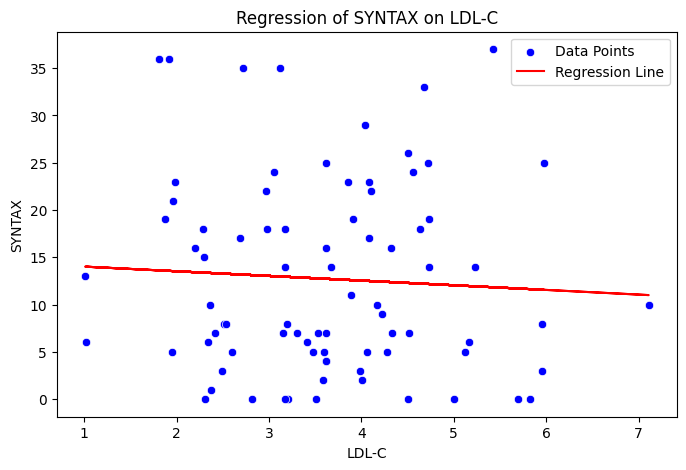

In [ ]:
# REGRESSION OF SYNTAX ON LDL-C
y = df[['SYNTAX']]  # Predictor
# Reshape X to be a 2D array using reshape(-1, 1)
X = df['LDL-C'].values.reshape(-1, 1)  # Response variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Coefficients
print(f"Coefficient: {model.coef_[0]}")

# Evaluate model
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# Visualization
plt.figure(figsize=(8, 5))
# Changed x to the correct column name 'Peak Creatinine (µmol/L or mg/dl)'
sns.scatterplot(x='LDL-C', y='SYNTAX', data=df, color='blue', label='Data Points')
plt.plot(df['LDL-C'], y_pred, color='red', label='Regression Line')
plt.xlabel('LDL-C')
plt.ylabel('SYNTAX')
plt.title('Regression of SYNTAX on LDL-C')
plt.legend()
plt.show()


Regression of SYNTAX on LDL-C:  
The coefficient
estimates is -0.49 suggesting there is a negative relationship between LDL-C and SYNTAX.
However, the regression line is almost flat suggesting that this negative relationship is quite
weak. The R-squared is 0.0034 indicating poor model fit and low explanatory power of our
model. The above scatter plot shows that data points are quite spread out and some of them are far away from regression line
indicating poor model fit and low explanatory power of our regression model.


Coefficient: [-0.19240986]
R-squared: 0.0006070651479156419


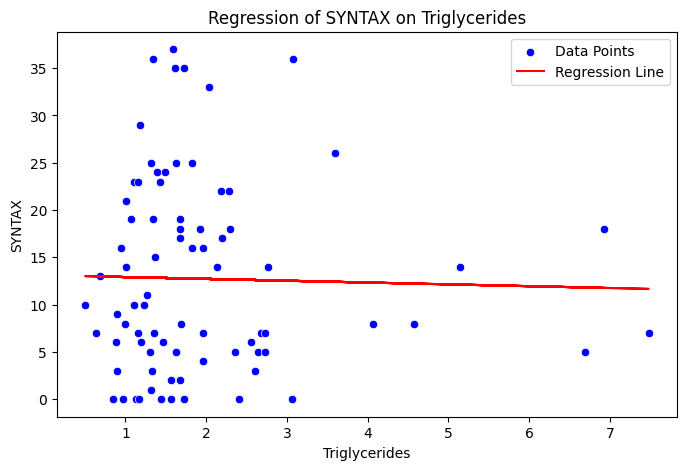

In [ ]:
# REGRESSION OF SYNTAX ON  Triglycerides
y = df[['SYNTAX']]  # Predictor
# Reshape X to be a 2D array using reshape(-1, 1)
X = df['Triglycerides'].values.reshape(-1, 1)  # Response variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Coefficients
print(f"Coefficient: {model.coef_[0]}")

# Evaluate model
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# Visualization
plt.figure(figsize=(8, 5))
# Changed x to the correct column name 'Peak Creatinine (µmol/L or mg/dl)'
sns.scatterplot(x='Triglycerides', y='SYNTAX', data=df, color='blue', label='Data Points')
plt.plot(df['Triglycerides'], y_pred, color='red', label='Regression Line')
plt.xlabel('Triglycerides')
plt.ylabel('SYNTAX')
plt.title('Regression of SYNTAX on Triglycerides')
plt.legend()
plt.show()

Regression of SYNTAX on Triglycerides:  
The
coefficient estimate of Triglycerides is -0.19 suggesting a negative relationship between the two
variables. However, the regression line is almost flat suggesting that this negative relationship is
quite weak. However, R-squared is 0.0006 suggesting that the model has a very low explanatory power
in explaining the variation in SYNTAX. The above scatter plot shows that data points are quite
spread out and some of the data points are far away from regression line. This finding explains
the low explanatory power and bad model fit.

Coefficient: [-5.7780248]
R-squared: 0.029708892403648046


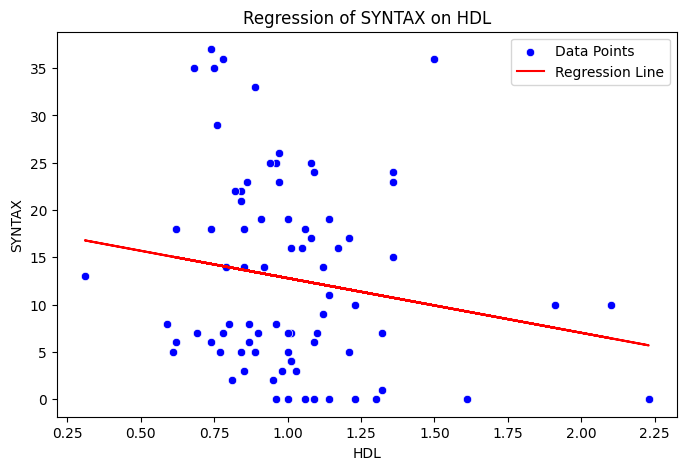

In [ ]:
# REGRESSION OF SYNTAX ON HDL
y = df[['SYNTAX']]  # Predictor
# Reshape X to be a 2D array using reshape(-1, 1)
X = df['HDL'].values.reshape(-1, 1)  # Response variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Coefficients
print(f"Coefficient: {model.coef_[0]}")

# Evaluate model
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# Visualization
plt.figure(figsize=(8, 5))
# Changed x to the correct column name 'Peak Creatinine (µmol/L or mg/dl)'
sns.scatterplot(x='HDL', y='SYNTAX', data=df, color='blue', label='Data Points')
plt.plot(df['HDL'], y_pred, color='red', label='Regression Line')
plt.xlabel('HDL')
plt.ylabel('SYNTAX')
plt.title('Regression of SYNTAX on HDL')
plt.legend()
plt.show()

Regression of SYNTAX on HDL:  
The coefficient
estimate of HDL is -5.78 suggesting that there is a very strong negative relationship between the
two variables. This coefficient estimate of HDL is more than 11 times larger than the largest
coefficient estimate in previous analysis suggesting that the relationship between SYNTAX and
HDL is the strongest relationship among all the variables investigated in this study. The R-squared is
0.0297 the highest R-squared we found so far suggesting that this model has the best model fit and the
highest explanatory power in explaining the variation in SYTAX. The above scatter plot
shows that the data points are not as spread out as previous models. Overall, the above regression
analysis shows that HDL is best predictor of SYNTAX compared to other predictors investigated
in this study.

In [ ]:
# CREATION OF CATEGORICAL VARIABLES USED IN MULTIVARIATE REGRESSIONS
df['Gender2'] = np.where(df['Gender'] == 'M', 1, 0)
df['DM2'] = np.where(df['DM'] == 'YES', 1, 0)
df['HTN2'] = np.where(df['HTN'] == 'YES', 1, 0)
df['Dyslipidemia2'] = np.where(df['Dyslipidemia'] == 'YES', 1, 0)
df['Current Smoking2'] = np.where(df['Current Smoking'] == 'YES', 1, 0)
df['Drug Abuse2'] = np.where(df['Drug Abuse'] == 'YES', 1, 0)
df['History of Heart Failure2'] = np.where(df['History of Heart Failure'] == 'YES', 1, 0)
df['History of Stroke2'] = np.where(df['History of Stroke'] == 'YES', 1, 0)
df['Hsitory of chronic kidney disease2'] = np.where(df['Hsitory of chronic kidney disease'] == 'YES', 1, 0)

We use several control variables in the below multivariate regressions. However, some of these control variables are string. We create categorical variables (which takes the value of 1 and 0, rather than string) for Gender, DM, HTN, Hsitory of chronic kidney disease,
Dyslipidemia, Current Smoking, Drug Abuse, History of Heart Failure, 'History of Stroke.

Intercept: 7.742616451440119
Coefficients: [-7.18594513e-03  2.13953122e-01 -1.15683171e-01 -1.42259017e+00
  1.88624449e-01  7.06816677e+00  2.49535262e+00 -1.95637114e+00
 -8.57664276e-01  1.17056428e+01  0.00000000e+00 -1.05203862e+01]
R-squared (R²): 0.17533999313094983


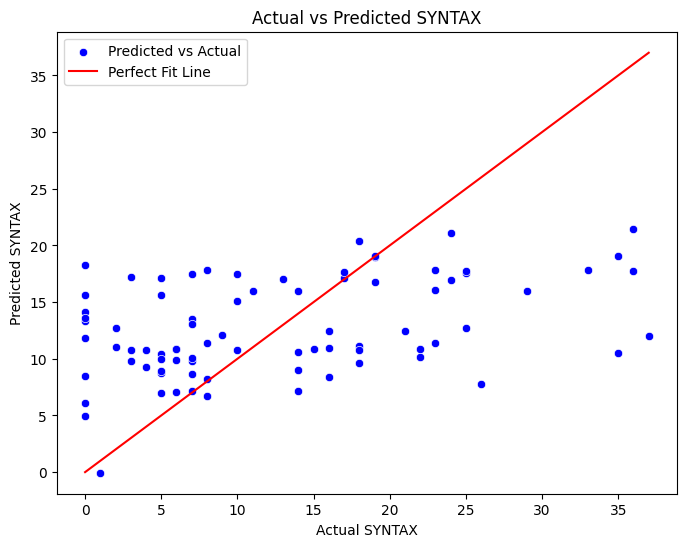

In [ ]:
# Multivariate Regression of SYNTAX on Peak Creatinine
# Define independent variables (X) and dependent variable (y)
X = df[['Peak Creatinine (µmol/L or mg/dl)', 'Age', 'BMI', 'Gender2', 'DM2', 'HTN2', 'Hsitory of chronic kidney disease2', 'Dyslipidemia2', 'Current Smoking2', 'Drug Abuse2', 'History of Heart Failure2', 'History of Stroke2']]  # Multiple predictors
y = df['SYNTAX']  # Response variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # Coefficients for each predictor

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("R-squared (R²):", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Perfect Fit Line')  # Reference line
plt.xlabel('Actual SYNTAX')
plt.ylabel('Predicted SYNTAX')
plt.title('Actual vs Predicted SYNTAX')
plt.legend()
plt.show()

Regression of SYNTAX on Peak Creatinine and Control Variables:  
We adjust for potential confounders such as age, gender, BMI, lifestyle factors,
and comorbidities. We
include these categorical variables in all multivariate regressions as control variables.  We estimate
the regression with Peak Creatinine and control variables. The coefficient
estimate of Peak Creatinine is -7.19 more than 100 times larger than the earlier univariate estimation.
Moreover, the R-squared is  0.1753 suggesting that the model fit increases more than 100 times compared to univariate regression
indicating that inclusion of control variables substantially increases the explanatory power of our
model. The actual vs predicted plot shows that the predicted data points are much closer
to perfect fit line than actual data points indicating the improvement of the model fit.

Intercept: 14.331141189421746
Coefficients: [ -0.53652838   0.21489932  -0.14835958   0.08656461  -0.19817928
   7.08623372   3.85525746  -1.87383024  -0.80710826  11.61820948
   0.         -10.3881443 ]
R-squared (R²): 0.18344645762704903


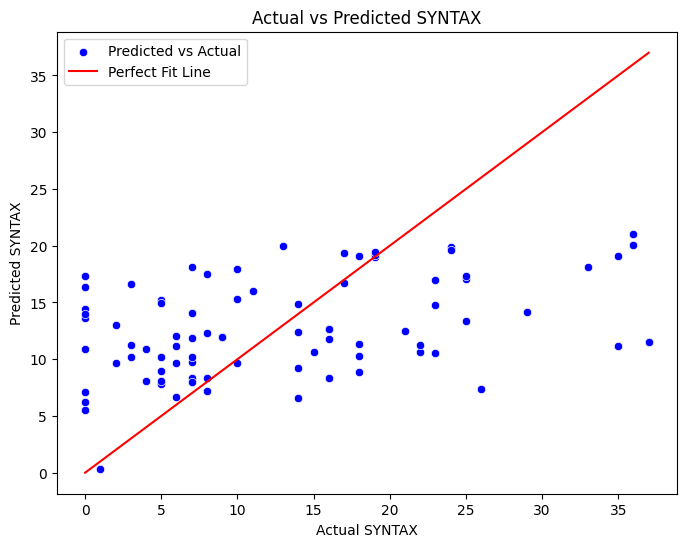

In [ ]:
# Multivariate Regression of Lowest Hb
# Define independent variables (X) and dependent variable (y)
X = df[['Lowest Hb', 'Age', 'BMI', 'Gender2', 'DM2', 'HTN2', 'Hsitory of chronic kidney disease2', 'Dyslipidemia2', 'Current Smoking2', 'Drug Abuse2', 'History of Heart Failure2', 'History of Stroke2']]  # Multiple predictors
y = df['SYNTAX']  # Response variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # Coefficients for each predictor

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("R-squared (R²):", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Perfect Fit Line')  # Reference line
plt.xlabel('Actual SYNTAX')
plt.ylabel('Predicted SYNTAX')
plt.title('Actual vs Predicted SYNTAX')
plt.legend()
plt.show()

Regression of SYNTAX on Lowest Hb and Control Variables:  
The above multivariate regression results indicate that the coefficient estimate of Lowest Hb is -0.54 almost the same as the
earlier estimation. Hence, the inclusion of the control variables does not make any difference in
the estimation. Moreover, the R-squared is 0.1834 suggesting that model fit for multivariate regression increased more than 100
times compared to univariate regression suggesting that inclusion of control variables substantially increases the explanatory power
of our model. The attached actual vs predicted plot shows that the predicted data points are much
closer to perfect fit line than actual data points indicating the improvement of the model fit.

Intercept: 8.747971695034817
Coefficients: [ -0.38991493   0.21683245  -0.10165881  -1.63724274  -0.08225299
   6.99559075   1.64537944  -1.70540815  -0.66430371  12.90821543
   0.         -11.00742402]
R-squared (R²): 0.1764393334951576


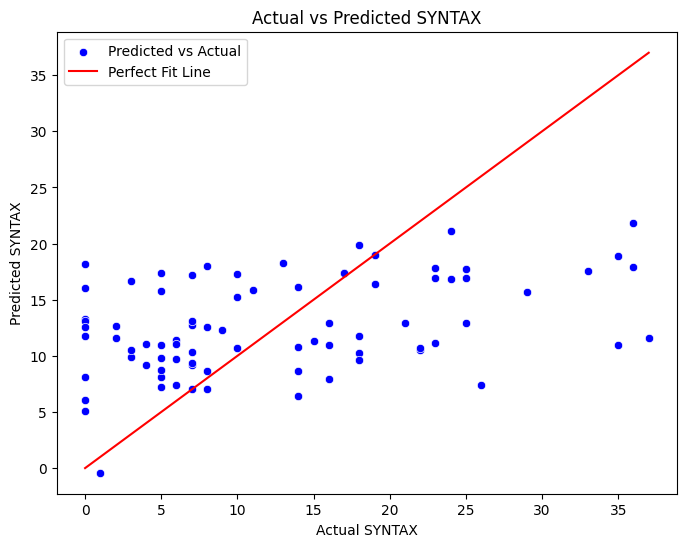

In [ ]:
# Multivariate Regression of Total Cholesterol
# Define independent variables (X) and dependent variable (y)
X = df[['Total Cholesterol', 'Age', 'BMI', 'Gender2', 'DM2', 'HTN2', 'Hsitory of chronic kidney disease2', 'Dyslipidemia2', 'Current Smoking2', 'Drug Abuse2', 'History of Heart Failure2', 'History of Stroke2']]  # Multiple predictors
y = df['SYNTAX']  # Response variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # Coefficients for each predictor

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("R-squared (R²):", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Perfect Fit Line')  # Reference line
plt.xlabel('Actual SYNTAX')
plt.ylabel('Predicted SYNTAX')
plt.title('Actual vs Predicted SYNTAX')
plt.legend()
plt.show()

Regression of SYNTAX on Total Cholesterol and Control Variables:   
The above results indicate that the coefficient estimate of Total Cholesterol is -0.39 almost twice that of the
univariate estimation. Moreover, the R-squared is 0.1764 suggesting that model fit for multivariate regression increased more than
1000 times compared to univariate regression suggesting that inclusion of control variables substantially increases the explanatory
power of our model. The attached actual vs predicted plot shows that the predicted data points
are much closer to perfect fit line than actual data points indicating the improvement of the
model fit.

Intercept: 7.852026528891955
Coefficients: [ -0.63188527   0.2211677   -0.08894999  -1.19920387  -0.23583499
   7.04264618   1.18059864  -1.65978274  -0.4473487   12.49896114
   0.         -11.10380386]
R-squared (R²): 0.1782715089835708


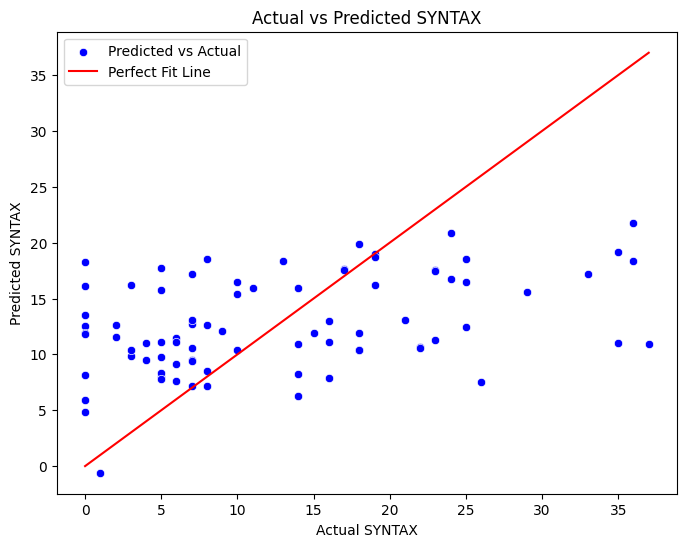

In [ ]:
# Multivariate Regression of LDL-C
# Define independent variables (X) and dependent variable (y)
X = df[['LDL-C', 'Age', 'BMI', 'Gender2', 'DM2', 'HTN2', 'Hsitory of chronic kidney disease2', 'Dyslipidemia2', 'Current Smoking2', 'Drug Abuse2', 'History of Heart Failure2', 'History of Stroke2']]  # Multiple predictors
y = df['SYNTAX']  # Response variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # Coefficients for each predictor

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("R-squared (R²):", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Perfect Fit Line')  # Reference line
plt.xlabel('Actual SYNTAX')
plt.ylabel('Predicted SYNTAX')
plt.title('Actual vs Predicted SYNTAX')
plt.legend()
plt.show()

Regression of SYNTAX on LDL-C and Control Variables:   
The above results indicate that the coefficient estimate of LDL-C is -0.63 slightly greater than the
univariate estimation. Moreover, the R-squared is 0.1783 suggesting that model fit for multivariate regression increased more than 50
times compared to univariate regression suggesting that the inclusion of control variables substantially increases the explanatory power
of our model. The attached actual vs predicted plot shows that the predicted data points are much
closer to perfect fit line than actual data points indicating the improvement of the model fit.

Intercept: 6.9473473450582315
Coefficients: [  0.21035601   0.22255571  -0.13001993  -1.55609533   0.17585307
   7.03141399   2.45327672  -1.91894113  -0.94069627  12.00988776
   0.         -10.26500359]
R-squared (R²): 0.17509402024988874


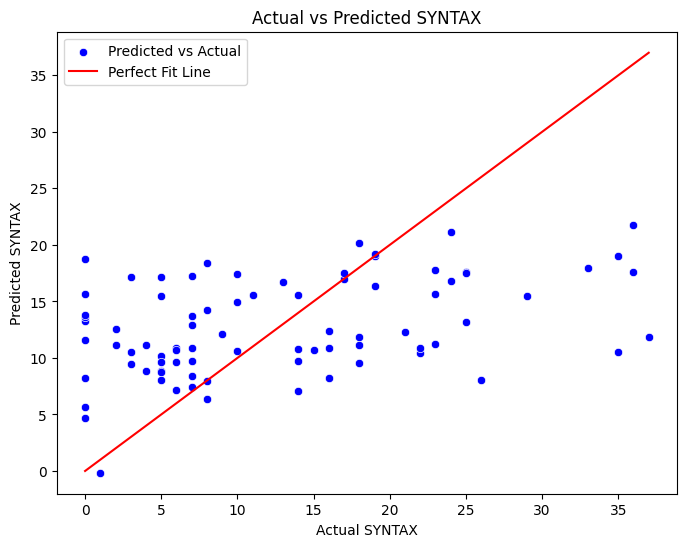

In [ ]:
# Multivariate Regression of SYNTAX on Triglycerides and Control Variables
# Define independent variables (X) and dependent variable (y)
X = df[['Triglycerides', 'Age', 'BMI', 'Gender2', 'DM2', 'HTN2', 'Hsitory of chronic kidney disease2', 'Dyslipidemia2', 'Current Smoking2', 'Drug Abuse2', 'History of Heart Failure2', 'History of Stroke2']]  # Multiple predictors
y = df['SYNTAX']  # Response variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # Coefficients for each predictor

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("R-squared (R²):", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Perfect Fit Line')  # Reference line
plt.xlabel('Actual SYNTAX')
plt.ylabel('Predicted SYNTAX')
plt.title('Actual vs Predicted SYNTAX')
plt.legend()
plt.show()

Regression of SYNTAX on Triglycerides and Control Variables:   
The above results indicate that the coefficient estimate of Triglycerides is 0.21 suggesting that the inclusion
of the control variables flip the sign of the coefficient estimate (i.e. the coefficient estimate was
negative in univariate estimation). Moreover, the R-squared is 0.1751 suggesting that model fit increased
more than 500 times suggesting that the inclusion of control variables substantially increases the
explanatory power of our model. The attached actual vs predicted plot shows that the predicted
data points are much closer to perfect fit line than actual data points indicating the improvement
of the model fit.

Intercept: 18.638671085947152
Coefficients: [ -8.15867339   0.24785606  -0.10524943  -6.53121179   0.57065972
   6.12205596   2.76559097  -2.10882761  -0.87959374  13.17300299
   0.         -11.85502056]
R-squared (R²): 0.21860127218168246


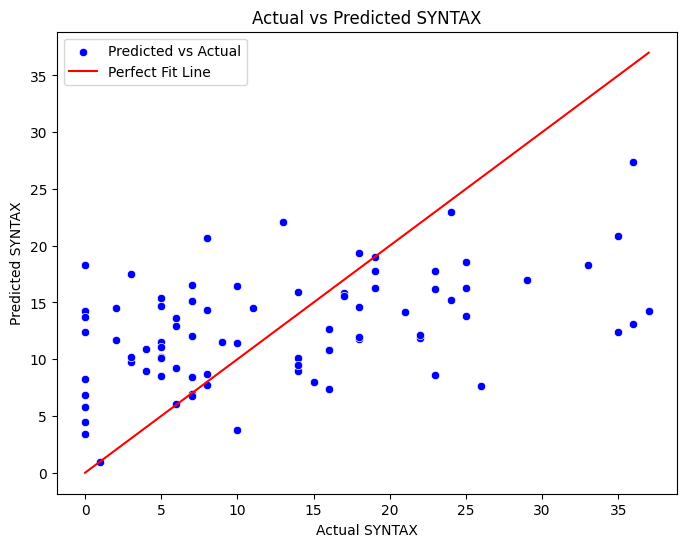

In [ ]:
# Multivariate Regression of SYNTAX on HDL and Control Variables
# Define independent variables (X) and dependent variable (y)
X = df[['HDL', 'Age', 'BMI', 'Gender2', 'DM2', 'HTN2', 'Hsitory of chronic kidney disease2', 'Dyslipidemia2', 'Current Smoking2', 'Drug Abuse2', 'History of Heart Failure2', 'History of Stroke2']]  # Multiple predictors
y = df['SYNTAX']  # Response variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # Coefficients for each predictor

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("R-squared (R²):", r2)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Perfect Fit Line')  # Reference line
plt.xlabel('Actual SYNTAX')
plt.ylabel('Predicted SYNTAX')
plt.title('Actual vs Predicted SYNTAX')
plt.legend()
plt.show()

Regression of SYNTAX on HDL and Control Variables:   
The above results indicate that the coefficient estimate of HDL is -8.16 suggesting that the inclusion of
control variables increased the coefficient estimate of HDL more than 50% compared to univariate estimation. Moreover, the R-squared is
0.2186 suggesting that model fit increased more than 7 times compared to univariate estimation indicating that the inclusion of control
variables substantially increases the explanatory power of our model. The attached actual vs
predicted plot shows that the predicted data points are much closer to perfect fit line than actual
data points indicating the improvement of the model fit. Overall, consistent with univariate
analysis, multivariate analysis shows that HDL has the largest coefficient estimate and its model
has the largest R-squared after including control variables. So we can conclude that HDL is best
predictor of SYNTAX among the variables investigated above.

PART II/c- Test of Significant Differences

In [71]:
#the Shapiro-Wilk TEST OF NORMAILITY for SYNTAX
stat, p_value = shapiro(df['SYNTAX'])
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Shapiro-Wilk Test Statistic: 0.9199850906723062
P-Value: 8.593739666251636e-05


In [72]:
# The Shapiro-Wilk TEST OF NORMAILITY for Peak Creatinine
stat, p_value = shapiro(df['Peak Creatinine (µmol/L or mg/dl)'])
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

Shapiro-Wilk Test Statistic: 0.3836450520472806
P-Value: 9.082747696837981e-17


We perform Wilk-Shapiro test for normality for SYNTAX and Peak
Creatinine. We find that the Wilk Shapiro tests are highly significant for both variables suggesting
that normality is rejected for both variables indicating that we should use non-parametric test in our
analysis (the analysis will be discussed in the next section) rather than parametric test for both variables.

In [74]:
#Mann Whitney U test for SYNTAX Grouped by Gender
# Split data by gender
male_scores = df[df['Gender'] == 'M']['SYNTAX']
female_scores = df[df['Gender'] == 'F']['SYNTAX']

# Perform Mann-Whitney U Test
stat, p = mannwhitneyu(male_scores, female_scores, alternative='two-sided')

print(f"U Statistic: {stat}")
print(f"P-value: {p}")

U Statistic: 189.0
P-value: 0.992157776865105


Mann-Whitney U test for SYNTAX Across Gender Groups:      
The above non-parametric Mann-Whitney U test result shows Mann-Whitney U Statistic: 189, P-value: 0.99 suggesting that there is
not a significant difference in SYNTAX score between male and female groups.

In [86]:
# Kruskal-Wallis H Test for Peak Creatinine groued by Type of Presentation
# Split data by category
group_a = df[df['Type of Presentation'] == 'STEMI']['Peak Creatinine (µmol/L or mg/dl)']
group_b = df[df['Type of Presentation'] == 'NSTEMI']['Peak Creatinine (µmol/L or mg/dl)']
group_c = df[df['Type of Presentation'] == 'UNSTABLE ANGINA']['Peak Creatinine (µmol/L or mg/dl)']

# Perform Kruskal-Wallis H Test
stat, p = kruskal(group_a, group_b, group_c)

print(f"Kruskal-Wallis Statistic: {stat}")
print(f"P-value: {p}")

Kruskal-Wallis Statistic: 0.5542407202749111
P-value: 0.757963263057619


Kruskal-Wallis H Test: for Peak Creatinine Across Type of Presentation Groups:   
There are three groups in Type of Presentation variable. Hence, we cannot use Man-Whitney U
test (which is used when there are only two categories). The Kruskal-Wallis Statistic: 0.5542, p-value: 0.76
suggesting that there are not significant differences in Peak Creatinine values across Type of
Presentation groups. We did not perform Tukey HSD because it assumes normality which is
rejected for Peak Creatinine as presented above.